# 01 - Exploration des Données - Home Credit Default Risk

Ce notebook présente une analyse exploratoire complète des données du projet Home Credit Default Risk.

**Objectif** : Comprendre les données, identifier les patterns importants et préparer le terrain pour la modélisation.

**Inspiré de** : [Will Koehrsen - Start Here: A Gentle Introduction](https://www.kaggle.com/code/willkoehrsen/start-here-a-gentle-introduction)

## Plan du Notebook

1. **Configuration et Chargement des Données**
2. **Exploration Initiale**
3. **Analyse de la Variable Cible**
4. **Analyse des Valeurs Manquantes**
5. **Analyse des Types de Variables**
6. **Analyse des Corrélations**
7. **Analyse de l'Âge**
8. **Détection d'Anomalies**
9. **Variables EXT_SOURCE**
10. **Conclusions et Prochaines Étapes**

## 1. Configuration et Imports

Importation des bibliothèques nécessaires pour l'analyse exploratoire.

In [1]:
# Manipulation de données
import numpy as np
import pandas as pd

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration système pour les imports
import sys
import os

# Suppression des warnings pour une sortie plus propre
import warnings
warnings.filterwarnings('ignore')

# Configuration de l'affichage pandas
pd.set_option('display.max_columns', None)  # Affiche toutes les colonnes
pd.set_option('display.max_rows', 100)      # Affiche jusqu'à 100 lignes

# Configuration du style des graphiques
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✓ Bibliothèques importées avec succès")

✓ Bibliothèques importées avec succès


## 2. Chargement des Données

Nous utilisons la fonction `load_raw_data()` pour charger tous les fichiers de données disponibles.

In [2]:
# Configuration du chemin du projet
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.insert(0, project_root)

# Import de la fonction de chargement
from src.data.load_data import load_raw_data

# Chargement des données
raw_data = load_raw_data()

# Extraction des DataFrames principaux
app_train = raw_data.application_train
app_test = raw_data.application_test

print(f"✓ Données chargées :")
print(f"  - Ensemble d'entraînement : {app_train.shape}")
print(f"  - Ensemble de test : {app_test.shape}")

Chargement depuis : /home/valentin/Env_Python/OC_P6/data/raw
✓ Chargement de application_train.csv
✓ Chargement de application_test.csv
✓ Chargement de bureau.csv
✓ Chargement de bureau_balance.csv
✓ Chargement de credit_card_balance.csv
✓ Chargement de installments_payments.csv
✓ Chargement de POS_CASH_balance.csv
✓ Chargement de previous_application.csv
✓ Données chargées :
  - Ensemble d'entraînement : (307511, 122)
  - Ensemble de test : (48744, 121)


## 3. Exploration Initiale

Examinons la structure de base des données d'entraînement.

In [3]:
# Aperçu des premières lignes
print("=== Premières lignes du dataset ===")
app_train.head()

=== Premières lignes du dataset ===


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [4]:
# Informations générales sur le dataset
print("=== Informations sur le dataset ===")
print(f"Nombre de lignes : {app_train.shape[0]:,}")
print(f"Nombre de colonnes : {app_train.shape[1]:,}")
print(f"\nMémoire utilisée : {app_train.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

=== Informations sur le dataset ===
Nombre de lignes : 307,511
Nombre de colonnes : 122

Mémoire utilisée : 504.99 MB


In [5]:
# Types de données
print("=== Répartition des types de données ===")
print(app_train.dtypes.value_counts())

=== Répartition des types de données ===
float64    65
int64      41
object     16
Name: count, dtype: int64


## 4. Analyse de la Variable Cible (TARGET)

La variable TARGET indique si un client a eu des difficultés de paiement :
- **0** : Pas de difficulté de paiement
- **1** : Difficulté de paiement

Cette analyse nous permet de comprendre le **déséquilibre des classes**, crucial pour la modélisation.

In [6]:
# Distribution de la variable cible
print("=== Distribution de la Variable Cible ===")
target_counts = app_train['TARGET'].value_counts()
target_pct = app_train['TARGET'].value_counts(normalize=True) * 100

print(f"\nNombre de clients par catégorie :")
print(f"  - Sans difficulté (0) : {target_counts[0]:,} ({target_pct[0]:.2f}%)")
print(f"  - Avec difficulté (1) : {target_counts[1]:,} ({target_pct[1]:.2f}%)")

ratio = target_counts[0] / target_counts[1]
print(f"\n⚠️  Ratio de déséquilibre : {ratio:.1f}:1")
print("    → Les classes sont très déséquilibrées, il faudra en tenir compte dans la modélisation")

=== Distribution de la Variable Cible ===

Nombre de clients par catégorie :
  - Sans difficulté (0) : 282,686 (91.93%)
  - Avec difficulté (1) : 24,825 (8.07%)

⚠️  Ratio de déséquilibre : 11.4:1
    → Les classes sont très déséquilibrées, il faudra en tenir compte dans la modélisation


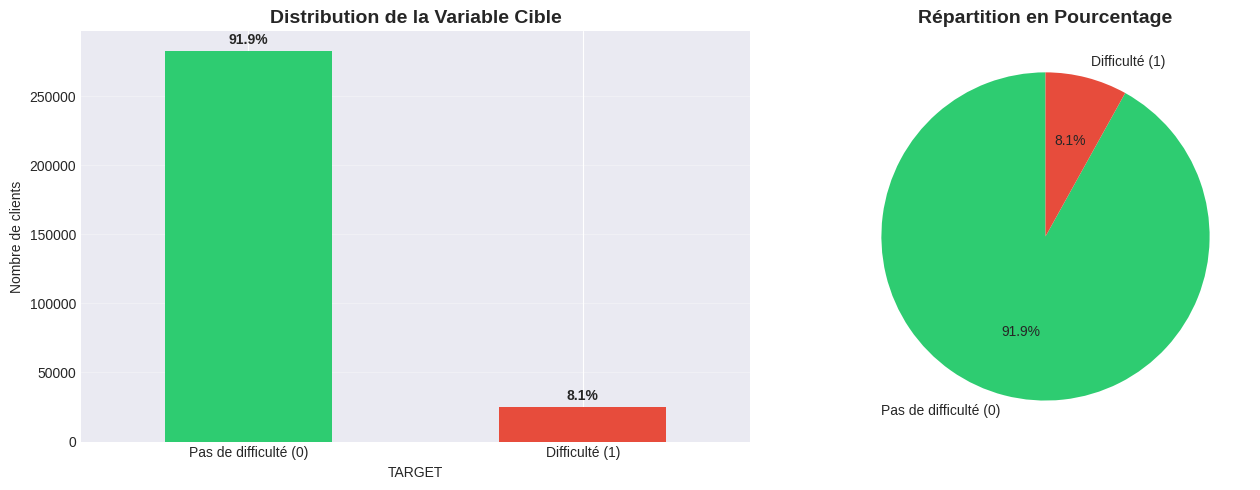

📊 Observation : Environ 92% des clients n'ont pas de difficultés, 8% en ont.


In [7]:
# Visualisation de la distribution de TARGET
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Graphique en barres
target_counts.plot(kind='bar', ax=axes[0], color=['#2ecc71', '#e74c3c'])
axes[0].set_title('Distribution de la Variable Cible', fontsize=14, fontweight='bold')
axes[0].set_xlabel('TARGET')
axes[0].set_ylabel('Nombre de clients')
axes[0].set_xticklabels(['Pas de difficulté (0)', 'Difficulté (1)'], rotation=0)
axes[0].grid(axis='y', alpha=0.3)

# Ajout des pourcentages sur les barres
for i, (count, pct) in enumerate(zip(target_counts, target_pct)):
    axes[0].text(i, count + 5000, f'{pct:.1f}%', ha='center', fontweight='bold')

# Graphique en camembert
axes[1].pie(target_counts, labels=['Pas de difficulté (0)', 'Difficulté (1)'], 
            autopct='%1.1f%%', startangle=90, colors=['#2ecc71', '#e74c3c'])
axes[1].set_title('Répartition en Pourcentage', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("📊 Observation : Environ 92% des clients n'ont pas de difficultés, 8% en ont.")

## 5. Analyse des Valeurs Manquantes

Les valeurs manquantes peuvent indiquer :
- Des informations non collectées
- Des données non applicables pour certains clients
- Des problèmes de qualité des données

Créons une fonction pour analyser systématiquement les valeurs manquantes.

In [8]:
def missing_values_table(df):
    """
    Calcule le nombre et le pourcentage de valeurs manquantes pour chaque colonne.
    
    Args:
        df: DataFrame à analyser
        
    Returns:
        DataFrame avec les colonnes ayant des valeurs manquantes, triées par pourcentage décroissant
    """
    # Nombre de valeurs manquantes
    mis_val = df.isnull().sum()
    
    # Pourcentage de valeurs manquantes
    mis_val_percent = 100 * mis_val / len(df)
    
    # Création du tableau de résultats
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table.columns = ['Valeurs Manquantes', 'Pourcentage (%)']
    
    # Tri par pourcentage décroissant et filtrage (seulement les colonnes avec des NaN)
    mis_val_table = mis_val_table[mis_val_table['Valeurs Manquantes'] > 0].sort_values(
        'Pourcentage (%)', ascending=False
    )
    
    # Affichage du résumé
    print(f"Le dataset contient {df.shape[1]} colonnes.")
    print(f"{mis_val_table.shape[0]} colonnes ont des valeurs manquantes.")
    
    return mis_val_table

# Application de la fonction
missing_train = missing_values_table(app_train)

Le dataset contient 122 colonnes.
67 colonnes ont des valeurs manquantes.


In [9]:
# Affichage des 20 colonnes avec le plus de valeurs manquantes
print("=== Top 20 des Colonnes avec le Plus de Valeurs Manquantes ===\n")
missing_train.head(20)

=== Top 20 des Colonnes avec le Plus de Valeurs Manquantes ===



,Valeurs Manquantes,Pourcentage (%)
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_MODE,214865,69.872297
COMMONAREA_AVG,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
FONDKAPREMONT_MODE,210295,68.386172
LIVINGAPARTMENTS_AVG,210199,68.354953
LIVINGAPARTMENTS_MEDI,210199,68.354953
LIVINGAPARTMENTS_MODE,210199,68.354953


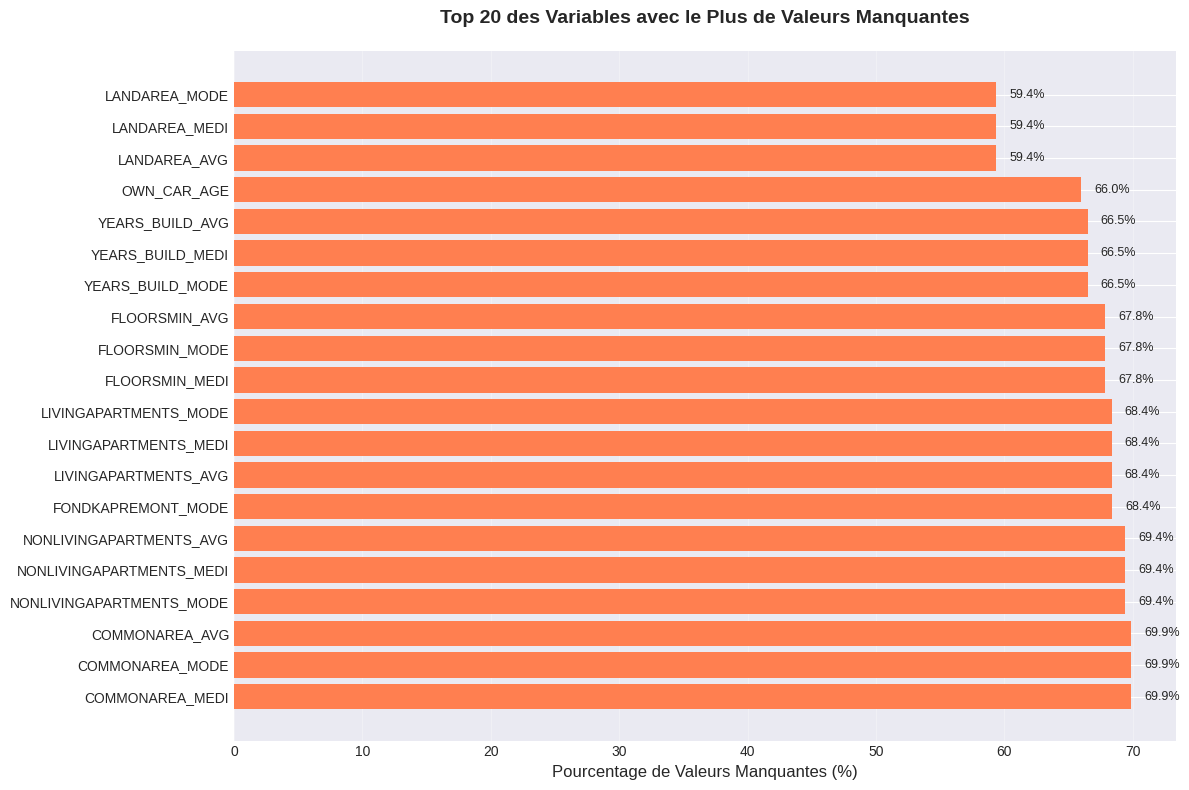


⚠️  49 colonnes ont plus de 40% de valeurs manquantes
    → Ces colonnes pourraient nécessiter une imputation sophistiquée ou être exclues


In [10]:
# Visualisation des valeurs manquantes
fig, ax = plt.subplots(figsize=(12, 8))

# Sélection des 20 colonnes avec le plus de valeurs manquantes
top_missing = missing_train.head(20)

# Création du graphique en barres horizontales
bars = ax.barh(range(len(top_missing)), top_missing['Pourcentage (%)'], color='coral')
ax.set_yticks(range(len(top_missing)))
ax.set_yticklabels(top_missing.index)
ax.set_xlabel('Pourcentage de Valeurs Manquantes (%)', fontsize=12)
ax.set_title('Top 20 des Variables avec le Plus de Valeurs Manquantes', 
             fontsize=14, fontweight='bold', pad=20)
ax.grid(axis='x', alpha=0.3)

# Ajout des valeurs à la fin des barres
for i, (idx, row) in enumerate(top_missing.iterrows()):
    ax.text(row['Pourcentage (%)'] + 1, i, f"{row['Pourcentage (%)']:.1f}%", 
            va='center', fontsize=9)

plt.tight_layout()
plt.show()

print(f"\n⚠️  {(missing_train['Pourcentage (%)'] > 40).sum()} colonnes ont plus de 40% de valeurs manquantes")
print("    → Ces colonnes pourraient nécessiter une imputation sophistiquée ou être exclues")

## 6. Analyse des Types de Variables

Séparons les variables numériques et catégorielles pour mieux comprendre la structure des données.

In [11]:
# Identification des types de colonnes
numeric_columns = app_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_columns = app_train.select_dtypes(include=['object']).columns.tolist()

print("=== Types de Variables ===")
print(f"\nVariables Numériques : {len(numeric_columns)}")
print(f"Variables Catégorielles : {len(categorical_columns)}")

print("\n--- Variables Catégorielles ---")
for col in categorical_columns:
    n_unique = app_train[col].nunique()
    print(f"  • {col}: {n_unique} valeurs uniques")

=== Types de Variables ===

Variables Numériques : 106
Variables Catégorielles : 16

--- Variables Catégorielles ---
  • NAME_CONTRACT_TYPE: 2 valeurs uniques
  • CODE_GENDER: 3 valeurs uniques
  • FLAG_OWN_CAR: 2 valeurs uniques
  • FLAG_OWN_REALTY: 2 valeurs uniques
  • NAME_TYPE_SUITE: 7 valeurs uniques
  • NAME_INCOME_TYPE: 8 valeurs uniques
  • NAME_EDUCATION_TYPE: 5 valeurs uniques
  • NAME_FAMILY_STATUS: 6 valeurs uniques
  • NAME_HOUSING_TYPE: 6 valeurs uniques
  • OCCUPATION_TYPE: 18 valeurs uniques
  • WEEKDAY_APPR_PROCESS_START: 7 valeurs uniques
  • ORGANIZATION_TYPE: 58 valeurs uniques
  • FONDKAPREMONT_MODE: 4 valeurs uniques
  • HOUSETYPE_MODE: 3 valeurs uniques
  • WALLSMATERIAL_MODE: 7 valeurs uniques
  • EMERGENCYSTATE_MODE: 2 valeurs uniques


In [12]:
# Analyse des variables catégorielles
print("=== Distribution des Variables Catégorielles ===\n")

for col in categorical_columns[:3]:  # Affichons les 3 premières pour l'exemple
    print(f"\n{col}:")
    print(app_train[col].value_counts())
    print("-" * 50)

=== Distribution des Variables Catégorielles ===


NAME_CONTRACT_TYPE:
NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
Name: count, dtype: int64
--------------------------------------------------

CODE_GENDER:
CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64
--------------------------------------------------

FLAG_OWN_CAR:
FLAG_OWN_CAR
N    202924
Y    104587
Name: count, dtype: int64
--------------------------------------------------


## 7. Analyse des Corrélations avec TARGET

Identifions les variables numériques les plus corrélées avec la variable cible.
Une **corrélation positive** indique que des valeurs élevées sont associées à plus de difficultés de paiement.
Une **corrélation négative** indique que des valeurs élevées sont associées à moins de difficultés.

In [13]:
# Calcul des corrélations avec TARGET (uniquement pour les variables numériques)
correlations = app_train.select_dtypes(include=[np.number]).corr()['TARGET'].sort_values(ascending=False)

# Suppression de TARGET lui-même
correlations = correlations.drop('TARGET')

print("=== Top 15 Corrélations POSITIVES avec TARGET ===")
print("(Valeurs élevées → Plus de risque de défaut)\n")
print(correlations.head(15))

print("\n\n=== Top 15 Corrélations NÉGATIVES avec TARGET ===")
print("(Valeurs élevées → Moins de risque de défaut)\n")
print(correlations.tail(15))

=== Top 15 Corrélations POSITIVES avec TARGET ===
(Valeurs élevées → Plus de risque de défaut)

DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
DAYS_REGISTRATION              0.041975
OWN_CAR_AGE                    0.037612
LIVE_CITY_NOT_WORK_CITY        0.032518
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
DEF_60_CNT_SOCIAL_CIRCLE       0.031276
FLAG_WORK_PHONE                0.028524
Name: TARGET, dtype: float64


=== Top 15 Corrélations NÉGATIVES avec TARGET ===
(Valeurs élevées → Moins de risque de défaut)

LIVINGAREA_MEDI              -0.032739
LIVINGAREA_AVG               -0.032997
FLOORSMIN_MEDI               -0.033394
FLOORSMIN_AVG                -0.033614
ELEVATORS_MEDI      

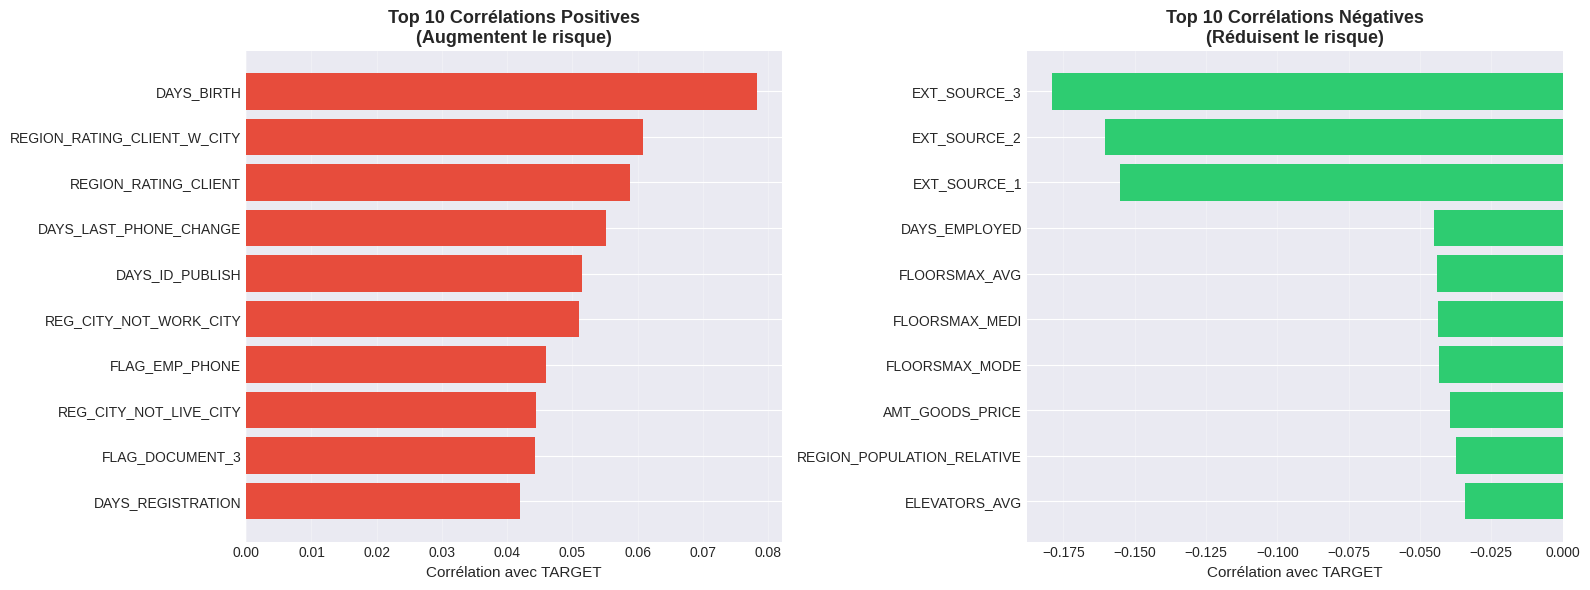


📊 Observation clé : Les variables EXT_SOURCE ont les corrélations négatives les plus fortes
    → Plus les scores EXT_SOURCE sont élevés, moins il y a de risque de défaut


In [14]:
# Visualisation des corrélations les plus fortes
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Top 10 corrélations positives
top_positive = correlations.head(10)
axes[0].barh(range(len(top_positive)), top_positive.values, color='#e74c3c')
axes[0].set_yticks(range(len(top_positive)))
axes[0].set_yticklabels(top_positive.index, fontsize=10)
axes[0].set_xlabel('Corrélation avec TARGET', fontsize=11)
axes[0].set_title('Top 10 Corrélations Positives\n(Augmentent le risque)', 
                  fontsize=13, fontweight='bold')
axes[0].grid(axis='x', alpha=0.3)
axes[0].invert_yaxis()

# Top 10 corrélations négatives
top_negative = correlations.tail(10).sort_values()
axes[1].barh(range(len(top_negative)), top_negative.values, color='#2ecc71')
axes[1].set_yticks(range(len(top_negative)))
axes[1].set_yticklabels(top_negative.index, fontsize=10)
axes[1].set_xlabel('Corrélation avec TARGET', fontsize=11)
axes[1].set_title('Top 10 Corrélations Négatives\n(Réduisent le risque)', 
                  fontsize=13, fontweight='bold')
axes[1].grid(axis='x', alpha=0.3)
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

print("\n📊 Observation clé : Les variables EXT_SOURCE ont les corrélations négatives les plus fortes")
print("    → Plus les scores EXT_SOURCE sont élevés, moins il y a de risque de défaut")

## 8. Analyse de l'Âge (DAYS_BIRTH)

La variable `DAYS_BIRTH` est négative (nombre de jours avant la demande).
Convertissons-la en années pour une meilleure interprétation.

In [15]:
# Conversion de DAYS_BIRTH en années
app_train['YEARS_BIRTH'] = abs(app_train['DAYS_BIRTH']) / 365

print("=== Statistiques sur l'Âge des Clients ===")
print(app_train['YEARS_BIRTH'].describe())
print(f"\n• Âge moyen : {app_train['YEARS_BIRTH'].mean():.1f} ans")
print(f"• Âge médian : {app_train['YEARS_BIRTH'].median():.1f} ans")
print(f"• Âge min : {app_train['YEARS_BIRTH'].min():.1f} ans")
print(f"• Âge max : {app_train['YEARS_BIRTH'].max():.1f} ans")

=== Statistiques sur l'Âge des Clients ===
count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: YEARS_BIRTH, dtype: float64

• Âge moyen : 43.9 ans
• Âge médian : 43.2 ans
• Âge min : 20.5 ans
• Âge max : 69.1 ans


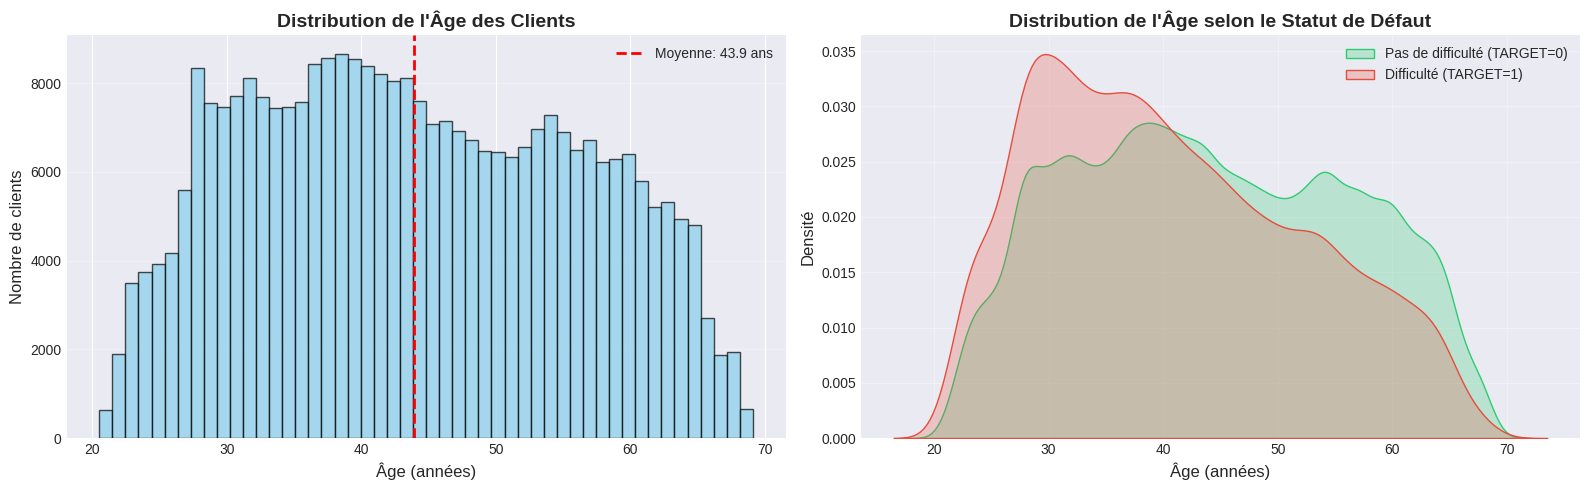


📊 Âge moyen selon le statut :
  • Sans difficulté : 44.2 ans
  • Avec difficulté : 40.8 ans
  • Différence : 3.4 ans

💡 Les clients plus jeunes ont tendance à avoir légèrement plus de difficultés de paiement


In [16]:
# Distribution de l'âge selon le statut de défaut
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Distribution globale
axes[0].hist(app_train['YEARS_BIRTH'], bins=50, edgecolor='black', alpha=0.7, color='skyblue')
axes[0].set_xlabel('Âge (années)', fontsize=12)
axes[0].set_ylabel('Nombre de clients', fontsize=12)
axes[0].set_title('Distribution de l\'Âge des Clients', fontsize=14, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)
axes[0].axvline(app_train['YEARS_BIRTH'].mean(), color='red', linestyle='--', 
                linewidth=2, label=f'Moyenne: {app_train["YEARS_BIRTH"].mean():.1f} ans')
axes[0].legend()

# KDE par statut TARGET
sns.kdeplot(data=app_train[app_train['TARGET'] == 0]['YEARS_BIRTH'], 
            ax=axes[1], label='Pas de difficulté (TARGET=0)', shade=True, color='#2ecc71')
sns.kdeplot(data=app_train[app_train['TARGET'] == 1]['YEARS_BIRTH'], 
            ax=axes[1], label='Difficulté (TARGET=1)', shade=True, color='#e74c3c')
axes[1].set_xlabel('Âge (années)', fontsize=12)
axes[1].set_ylabel('Densité', fontsize=12)
axes[1].set_title('Distribution de l\'Âge selon le Statut de Défaut', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Calcul des moyennes par groupe
mean_age_no_default = app_train[app_train['TARGET'] == 0]['YEARS_BIRTH'].mean()
mean_age_default = app_train[app_train['TARGET'] == 1]['YEARS_BIRTH'].mean()

print(f"\n📊 Âge moyen selon le statut :")
print(f"  • Sans difficulté : {mean_age_no_default:.1f} ans")
print(f"  • Avec difficulté : {mean_age_default:.1f} ans")
print(f"  • Différence : {abs(mean_age_no_default - mean_age_default):.1f} ans")
print("\n💡 Les clients plus jeunes ont tendance à avoir légèrement plus de difficultés de paiement")

## 9. Détection d'Anomalies - DAYS_EMPLOYED

Examinons la variable `DAYS_EMPLOYED` (nombre de jours d'emploi avant la demande).
Des valeurs anormales peuvent indiquer des cas spéciaux ou des erreurs de données.

In [17]:
# Examen de DAYS_EMPLOYED
print("=== Statistiques sur DAYS_EMPLOYED ===")
print(app_train['DAYS_EMPLOYED'].describe())

# Vérification des valeurs extrêmes
print(f"\n• Valeur maximale : {app_train['DAYS_EMPLOYED'].max()}")
print(f"• Nombre de valeurs = 365243 : {(app_train['DAYS_EMPLOYED'] == 365243).sum():,}")
print(f"  → Représente {(app_train['DAYS_EMPLOYED'] == 365243).mean() * 100:.2f}% des données")

print("\n⚠️  La valeur 365243 (~1000 ans) est clairement une anomalie")
print("    → Il s'agit probablement d'un flag pour indiquer une situation particulière")
print("       (ex: retraité, sans emploi, etc.)")

=== Statistiques sur DAYS_EMPLOYED ===
count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

• Valeur maximale : 365243
• Nombre de valeurs = 365243 : 55,374
  → Représente 18.01% des données

⚠️  La valeur 365243 (~1000 ans) est clairement une anomalie
    → Il s'agit probablement d'un flag pour indiquer une situation particulière
       (ex: retraité, sans emploi, etc.)


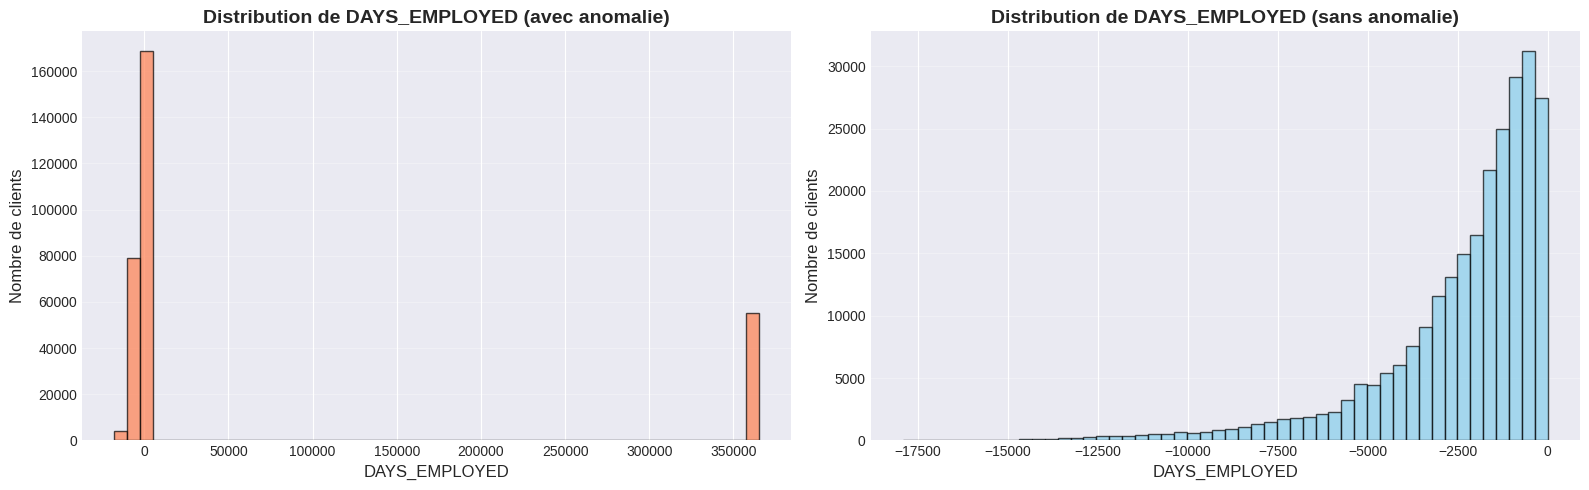

In [18]:
# Visualisation de DAYS_EMPLOYED
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Histogramme avec l'anomalie
axes[0].hist(app_train['DAYS_EMPLOYED'], bins=50, edgecolor='black', alpha=0.7, color='coral')
axes[0].set_xlabel('DAYS_EMPLOYED', fontsize=12)
axes[0].set_ylabel('Nombre de clients', fontsize=12)
axes[0].set_title('Distribution de DAYS_EMPLOYED (avec anomalie)', fontsize=14, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

# Histogramme sans l'anomalie
app_train_no_anom = app_train[app_train['DAYS_EMPLOYED'] != 365243]
axes[1].hist(app_train_no_anom['DAYS_EMPLOYED'], bins=50, edgecolor='black', alpha=0.7, color='skyblue')
axes[1].set_xlabel('DAYS_EMPLOYED', fontsize=12)
axes[1].set_ylabel('Nombre de clients', fontsize=12)
axes[1].set_title('Distribution de DAYS_EMPLOYED (sans anomalie)', fontsize=14, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [19]:
# Création d'un flag pour l'anomalie et traitement
app_train['DAYS_EMPLOYED_ANOM'] = app_train['DAYS_EMPLOYED'] == 365243
app_test['DAYS_EMPLOYED_ANOM'] = app_test['DAYS_EMPLOYED'] == 365243

# Comparaison du taux de défaut
print("=== Impact de l'Anomalie sur le Taux de Défaut ===\n")

anom_default_rate = app_train[app_train['DAYS_EMPLOYED_ANOM']]['TARGET'].mean() * 100
normal_default_rate = app_train[~app_train['DAYS_EMPLOYED_ANOM']]['TARGET'].mean() * 100

print(f"Taux de défaut avec anomalie (DAYS_EMPLOYED = 365243) : {anom_default_rate:.2f}%")
print(f"Taux de défaut sans anomalie : {normal_default_rate:.2f}%")
print(f"Différence : {abs(anom_default_rate - normal_default_rate):.2f} points de pourcentage")

print("\n✓ Flag 'DAYS_EMPLOYED_ANOM' créé pour capturer cette information")
print("✓ Cette variable pourra être utilisée dans la modélisation")

# Remplacement de l'anomalie par NaN pour les futures analyses
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace=True)
app_test['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace=True)

print("\n✓ Valeurs 365243 remplacées par NaN dans DAYS_EMPLOYED")

=== Impact de l'Anomalie sur le Taux de Défaut ===

Taux de défaut avec anomalie (DAYS_EMPLOYED = 365243) : 5.40%
Taux de défaut sans anomalie : 8.66%
Différence : 3.26 points de pourcentage

✓ Flag 'DAYS_EMPLOYED_ANOM' créé pour capturer cette information
✓ Cette variable pourra être utilisée dans la modélisation

✓ Valeurs 365243 remplacées par NaN dans DAYS_EMPLOYED


## 10. Analyse des Variables EXT_SOURCE

Les variables `EXT_SOURCE_1`, `EXT_SOURCE_2`, et `EXT_SOURCE_3` sont normalisées entre 0 et 1.
Elles proviennent de sources externes et sont très prédictives du risque de défaut.

In [20]:
# Examen des variables EXT_SOURCE
ext_source_cols = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']

print("=== Statistiques sur les Variables EXT_SOURCE ===\n")
print(app_train[ext_source_cols].describe())

print("\n=== Valeurs Manquantes ===")
for col in ext_source_cols:
    missing_pct = app_train[col].isnull().mean() * 100
    print(f"{col}: {missing_pct:.2f}%")

=== Statistiques sur les Variables EXT_SOURCE ===

        EXT_SOURCE_1  EXT_SOURCE_2   EXT_SOURCE_3
count  134133.000000  3.068510e+05  246546.000000
mean        0.502130  5.143927e-01       0.510853
std         0.211062  1.910602e-01       0.194844
min         0.014568  8.173617e-08       0.000527
25%         0.334007  3.924574e-01       0.370650
50%         0.505998  5.659614e-01       0.535276
75%         0.675053  6.636171e-01       0.669057
max         0.962693  8.549997e-01       0.896010

=== Valeurs Manquantes ===
EXT_SOURCE_1: 56.38%
EXT_SOURCE_2: 0.21%
EXT_SOURCE_3: 19.83%


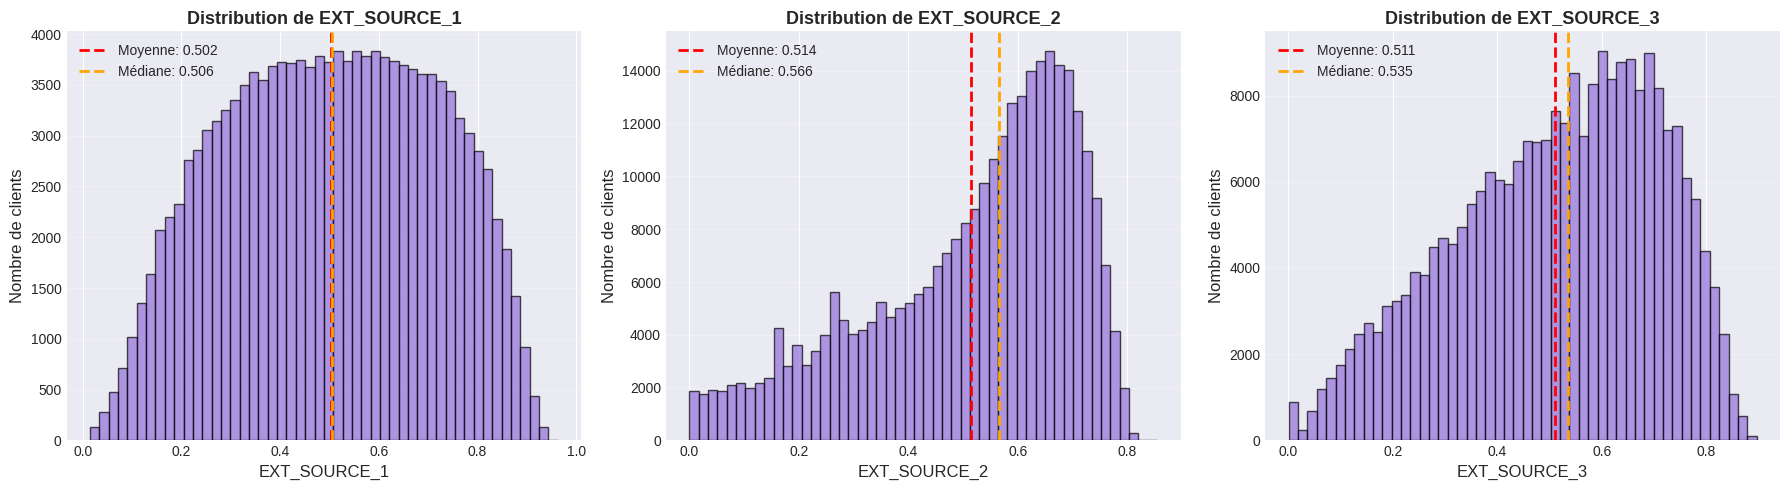

In [21]:
# Distribution des variables EXT_SOURCE
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, col in enumerate(ext_source_cols):
    axes[idx].hist(app_train[col].dropna(), bins=50, edgecolor='black', alpha=0.7, color='mediumpurple')
    axes[idx].set_xlabel(col, fontsize=12)
    axes[idx].set_ylabel('Nombre de clients', fontsize=12)
    axes[idx].set_title(f'Distribution de {col}', fontsize=13, fontweight='bold')
    axes[idx].grid(axis='y', alpha=0.3)
    
    # Statistiques
    mean_val = app_train[col].mean()
    median_val = app_train[col].median()
    axes[idx].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Moyenne: {mean_val:.3f}')
    axes[idx].axvline(median_val, color='orange', linestyle='--', linewidth=2, label=f'Médiane: {median_val:.3f}')
    axes[idx].legend()

plt.tight_layout()
plt.show()

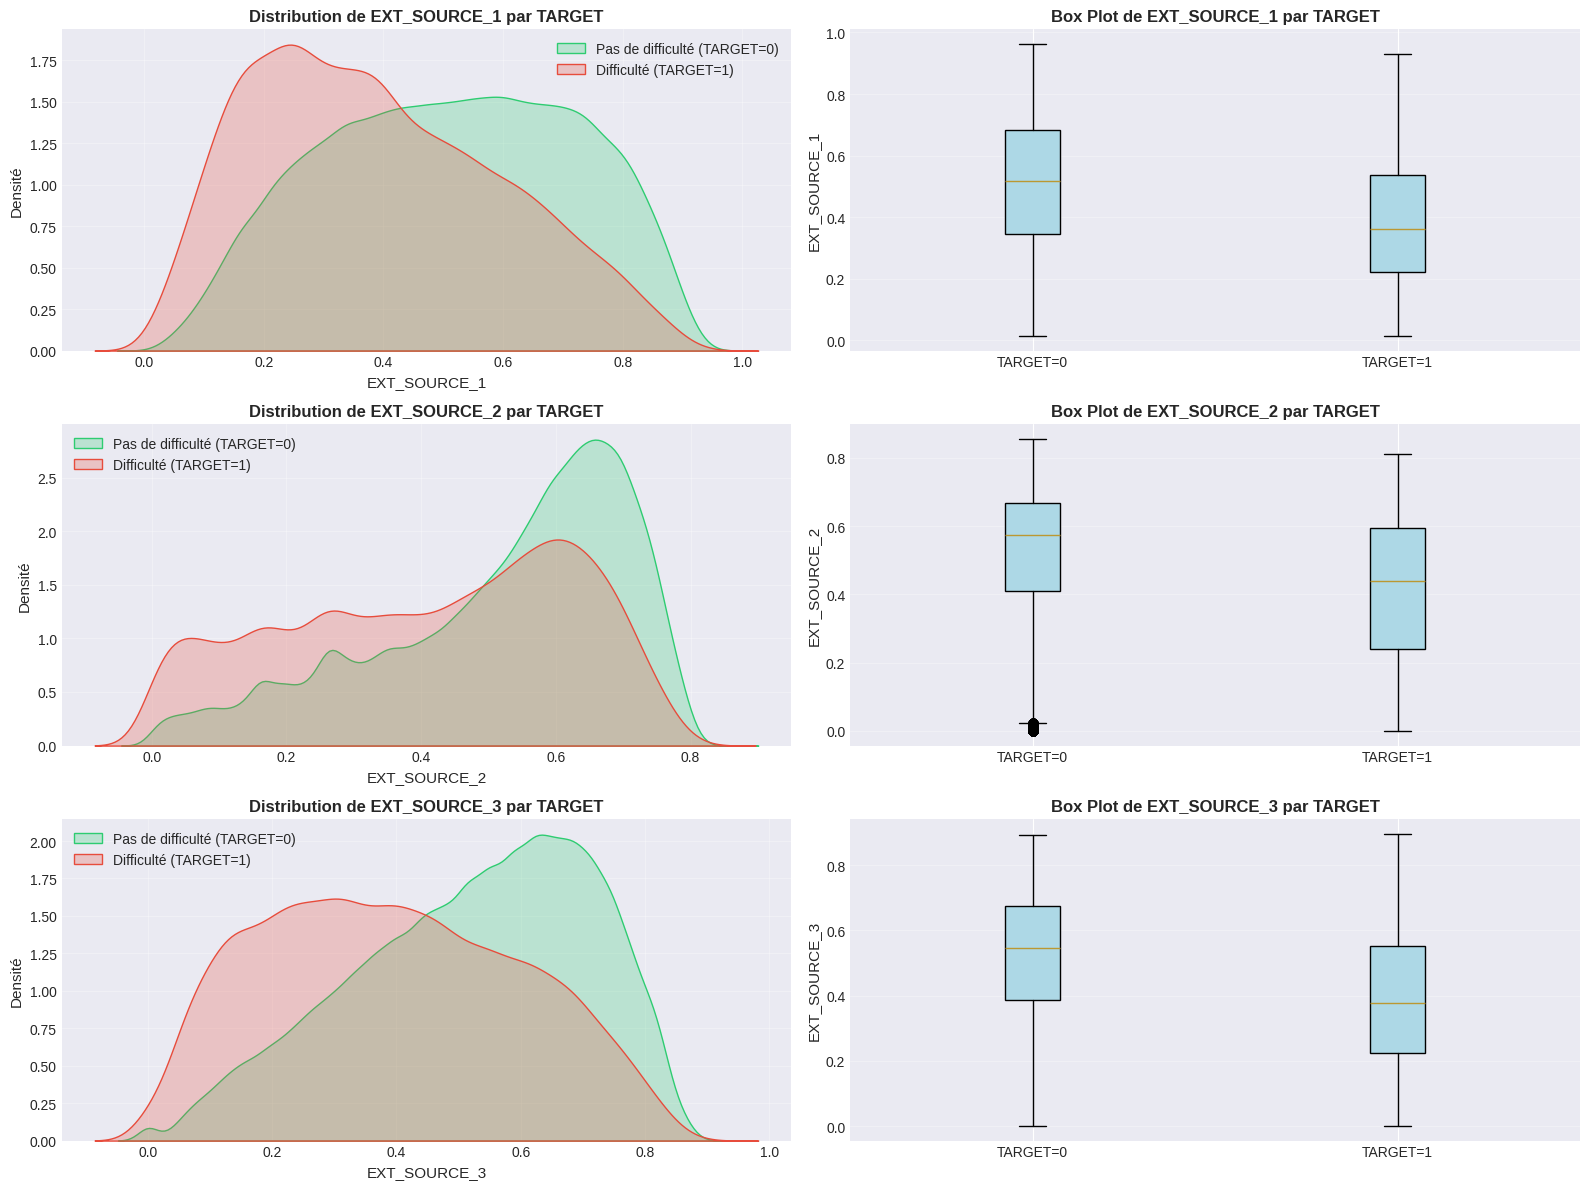


💡 Observation clé : Les clients avec TARGET=1 ont des scores EXT_SOURCE plus faibles
    → Ces variables sont des prédicteurs très importants du risque de défaut


In [22]:
# Comparaison des distributions EXT_SOURCE par TARGET
fig, axes = plt.subplots(3, 2, figsize=(16, 12))

for idx, col in enumerate(ext_source_cols):
    # KDE Plot
    sns.kdeplot(data=app_train[app_train['TARGET'] == 0][col].dropna(), 
                ax=axes[idx, 0], label='Pas de difficulté (TARGET=0)', 
                shade=True, color='#2ecc71')
    sns.kdeplot(data=app_train[app_train['TARGET'] == 1][col].dropna(), 
                ax=axes[idx, 0], label='Difficulté (TARGET=1)', 
                shade=True, color='#e74c3c')
    axes[idx, 0].set_xlabel(col, fontsize=11)
    axes[idx, 0].set_ylabel('Densité', fontsize=11)
    axes[idx, 0].set_title(f'Distribution de {col} par TARGET', fontsize=12, fontweight='bold')
    axes[idx, 0].legend()
    axes[idx, 0].grid(alpha=0.3)
    
    # Box Plot
    data_to_plot = [
        app_train[app_train['TARGET'] == 0][col].dropna(),
        app_train[app_train['TARGET'] == 1][col].dropna()
    ]
    axes[idx, 1].boxplot(data_to_plot, labels=['TARGET=0', 'TARGET=1'], patch_artist=True,
                         boxprops=dict(facecolor='lightblue'))
    axes[idx, 1].set_ylabel(col, fontsize=11)
    axes[idx, 1].set_title(f'Box Plot de {col} par TARGET', fontsize=12, fontweight='bold')
    axes[idx, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n💡 Observation clé : Les clients avec TARGET=1 ont des scores EXT_SOURCE plus faibles")
print("    → Ces variables sont des prédicteurs très importants du risque de défaut")

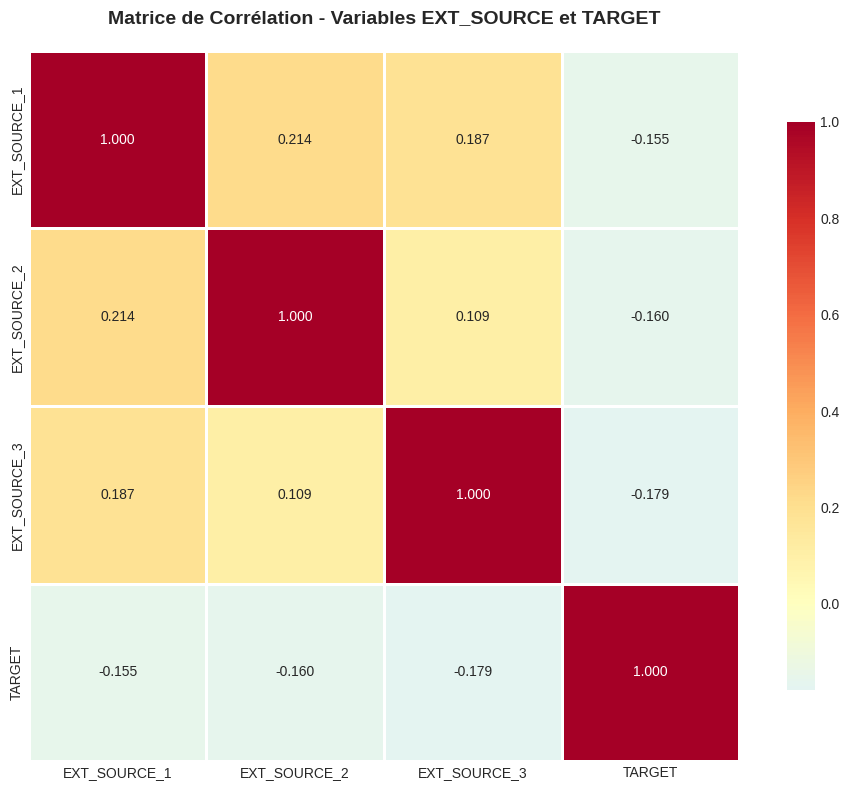


📊 Insights :
  • EXT_SOURCE_2 et EXT_SOURCE_3 ont les corrélations négatives les plus fortes avec TARGET
  • Les trois variables EXT_SOURCE sont faiblement corrélées entre elles
  → Elles apportent des informations complémentaires (peu de redondance)


In [23]:
# Matrice de corrélation des EXT_SOURCE avec TARGET
ext_source_corr = app_train[ext_source_cols + ['TARGET']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(ext_source_corr, annot=True, fmt='.3f', cmap='RdYlBu_r', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matrice de Corrélation - Variables EXT_SOURCE et TARGET', 
          fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\n📊 Insights :")
print("  • EXT_SOURCE_2 et EXT_SOURCE_3 ont les corrélations négatives les plus fortes avec TARGET")
print("  • Les trois variables EXT_SOURCE sont faiblement corrélées entre elles")
print("  → Elles apportent des informations complémentaires (peu de redondance)")

## 11. Résumé et Conclusions

### 📌 Découvertes Principales

1. **Déséquilibre des Classes**
   - 92% de clients sans difficulté vs 8% avec difficulté
   - Nécessite des techniques de gestion du déséquilibre (pondération, SMOTE, etc.)

2. **Valeurs Manquantes**
   - Beaucoup de colonnes ont > 40% de valeurs manquantes
   - Stratégies d'imputation ou sélection de features nécessaires

3. **Variables Importantes Identifiées**
   - **EXT_SOURCE_1, 2, 3** : Corrélations négatives fortes (prédicteurs clés)
   - **DAYS_BIRTH (âge)** : Légère influence
   - **DAYS_EMPLOYED** : Contient une anomalie (365243) à traiter

4. **Anomalies Détectées**
   - DAYS_EMPLOYED = 365243 (flag spécial créé)
   - Valeurs remplacées par NaN pour éviter de biaiser les modèles

5. **Patterns Observés**
   - Les clients plus jeunes ont un risque légèrement plus élevé
   - Les scores EXT_SOURCE bas sont fortement associés au défaut
   - Les trois EXT_SOURCE sont peu corrélés → informations complémentaires

### 🎯 Prochaines Étapes

1. **Feature Engineering** (Notebook 02)
   - Créer des interactions entre variables (polynomiales, ratios)
   - Agréger les données des tables secondaires (bureau, previous_application, etc.)
   - Créer des features temporelles

2. **Preprocessing**
   - Imputation des valeurs manquantes
   - Encodage des variables catégorielles
   - Normalisation/Standardisation

3. **Modeling**
   - Tester différents algorithmes (LightGBM, XGBoost, etc.)
   - Gérer le déséquilibre des classes
   - Optimisation des hyperparamètres
   - Validation croisée stratifiée

### 📚 Références
- [Will Koehrsen - Start Here: A Gentle Introduction](https://www.kaggle.com/code/willkoehrsen/start-here-a-gentle-introduction)
- [Home Credit Default Risk Competition](https://www.kaggle.com/c/home-credit-default-risk)

In [24]:
# Sauvegarde des données nettoyées pour le prochain notebook
print("💾 Préparation des données pour le notebook suivant...")

# Note : Nous sauvegarderons les données transformées après feature engineering complet
print("\n✓ Notebook d'exploration terminé")
print("✓ Passez au notebook 02_preparation_features.ipynb pour la suite")

💾 Préparation des données pour le notebook suivant...

✓ Notebook d'exploration terminé
✓ Passez au notebook 02_preparation_features.ipynb pour la suite
